In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df= pd.read_excel('halyttajat.xlsx')

In [3]:
df.head()

,(Älä muokkaa) Palvelupyyntö,(Älä muokkaa) Rivin tarkistussumma,(Älä muokkaa) Muokattu,Luotu,Asiakkuus
0,86734381-f183-e911-80f2-001dd8bd36f8,Ben0D1pes7YTkEtaLuW9dJ1c8jXqjBO+aFdaOVC6fPlOiE...,2019-06-01 02:29:18,2019-06-01 01:14:50,Hoiva Eteläinen kotihoitoyksikkö
1,676456cb-fc83-e911-80f2-001dd8bd36f8,PzoGl0Unrl0ttTTezRayoj+x0v4BDYFUDKOv+SF9wVTnef...,2019-06-01 04:39:12,2019-06-01 02:35:38,Hoiva Itsemaksavat
2,e6fa0e48-0184-e911-80f2-001dd8bd36f8,0ve//wK6p/0exepW0ER8nFw9/62DOYwxzYBIwWd/QW9oKv...,2019-06-01 03:08:30,2019-06-01 03:07:46,Hoiva Itsemaksavat
3,65993511-1484-e911-80f2-001dd8bd36f8,fcW+vo8KzAybQkU6I1MJv6LrUau0rexsqZDri010+dv8P5...,2019-06-01 06:24:18,2019-06-01 05:22:20,Hoiva Pohjoinen kotihoitoyksikkö
4,69c30085-2a84-e911-80f2-001dd8bd36f8,8AQ8MN7RupJWYQTYNw1af2zX91xqAiWsiiNdtuabDmNgu6...,2019-06-01 09:08:45,2019-06-01 08:02:57,Hoiva Kaakkoinen kotihoitoyksikkö


In [4]:
df1=pd.crosstab(df['Asiakkuus'], 'lkm')

In [5]:
df1=pd.crosstab(df['Asiakkuus'],'Hälytyksiä')
n=df1['Hälytyksiä'].sum()
df1['%']=(df1['Hälytyksiä']/n)*100
df1.loc['Yhteensä']=df1.sum()
df1.style.format({'%' : '{:.1f} %'})

col_0,Hälytyksiä,%
Asiakkuus,,
Hoiva Eteläinen kotihoitoyksikkö,250,6.5 %
Hoiva Itsemaksavat,1174,30.5 %
Hoiva Itäinen kotihoitoyksikkö,410,10.6 %
Hoiva Kaakkoinen kotihoitoyksikkö,358,9.3 %
Hoiva Keskinen kotihoitoyksikkö,474,12.3 %
Hoiva Koillinen kotihoitoyksikkö,429,11.1 %
Hoiva Lounainen kotihoitoyksikkö,286,7.4 %
Hoiva Läntinen kotihoitoyksikkö,334,8.7 %
Hoiva Pohjoinen kotihoitoyksikkö,140,3.6 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %')]

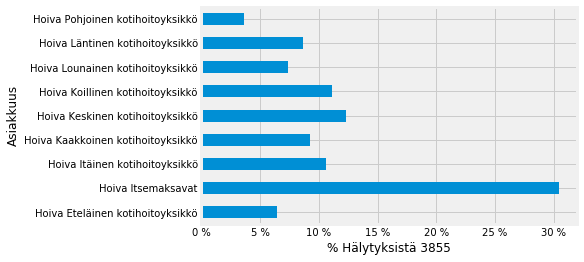

In [6]:
ax1=df1.drop('Yhteensä')['%'].plot.barh()
ax1.set_xlabel('% Hälytyksistä ' + str(n))
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

In [12]:
hinnat = pd.read_excel('aktiviiset_palvelusopimukset.xlsx')

In [13]:
 hinnat.head()

,(Älä muokkaa) Palvelusopimus,(Älä muokkaa) Rivin tarkistussumma,(Älä muokkaa) Muokattu,Tilan syy,Loppusumma,Pääasiakkuus
0,d9ef6780-23c1-e611-80e1-001dd8bd1d6c,mGPrpoLBoIwu252pw65Lp7tzUXmkvzanyKVdezYvVk8MnO...,2016-12-13 13:01:48,Uusi,54.0,Hoiva Itsemaksavat
1,06c7eb43-26c1-e611-80e1-001dd8bd1d6c,4/tkPwcoUV0n8wQUiQV8oQAFqdWXNN9A+n3Qm2YClkSCSm...,2016-12-13 13:21:55,Uusi,48.0,Hoiva Läntinen kotihoitoyksikkö
2,6a704712-21c1-e611-80e1-001dd8bd1d6c,w4McF99so7XlKwu9YJHLjW6rCjVG9e1T8B30S8bHIARMMU...,2019-03-26 13:49:01,Uusi,54.0,Hoiva Itsemaksavat
3,338758fe-d909-e511-80d0-001dd8bd1d6c,Ul3RvOoO9AOBpXbxeqGXQ7bjAkUmtZAUE1f30yrzAxWYD1...,2015-06-03 13:34:30,Uusi,48.0,Hoiva Pohjoinen kotihoitoyksikkö
4,3d8758fe-d909-e511-80d0-001dd8bd1d6c,STsc3yZde7KI9p6uz0JjSsxLZA5yToHUWBJZjMoyTFuMzC...,2015-06-03 13:34:30,Uusi,48.0,Hoiva Lounainen kotihoitoyksikkö


In [32]:
pd.pivot_table(hinnat,index=['Pääasiakkuus'],values=['Loppusumma'],aggfunc=np.sum)

,Loppusumma
Pääasiakkuus,
Asiakas Aino,0.00
Hoiva Eteläinen kotihoitoyksikkö,25578.75
Hoiva Itsemaksavat,81129.00
Hoiva Itäinen kotihoitoyksikkö,38829.00
Hoiva Kaakkoinen kotihoitoyksikkö,43480.00
Hoiva Keskinen kotihoitoyksikkö,43235.00
Hoiva Koillinen kotihoitoyksikkö,48779.00
Hoiva Lounainen kotihoitoyksikkö,25393.00
Hoiva Läntinen kotihoitoyksikkö,38306.00


Text(0.5, 0, 'Loppusumma')

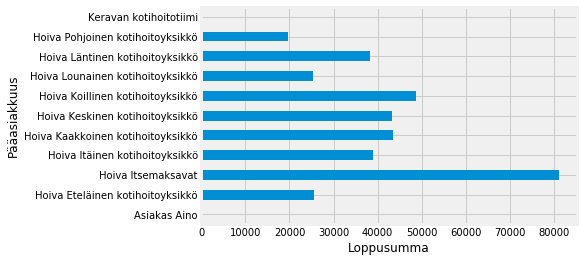

In [34]:
ax = pd.pivot_table(hinnat,index=["Pääasiakkuus"],values=['Loppusumma'],aggfunc=np.sum).plot.barh(legend=False)
ax.set_xlabel('Loppusumma')